#Download the dataset airline-passengers.csv

In [ ]:
from google.colab import files #This cell is used when running this code on Google Colab Platform
#uploaded = files.upload()

#Import Libraries

In [ ]:
import numpy
import pandas
import math
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

#a) Plot the time series data

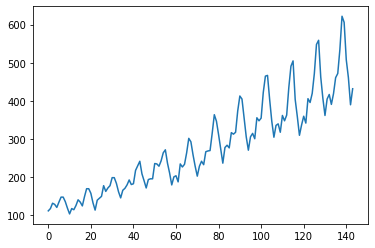

In [ ]:
# load  and plot the dataset excluding the first column
dataframe = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataframe)
plt.show()

#c) Build an LSTM network

In [ ]:
#A function that converts an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#Fix the random number seed to 0 in numpy for reproducibility
numpy.random.seed(0)

In [ ]:
#Convert the integer values in the data to floating point values
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
#Normalize the data to range (0 - 1) using MinMaxScaler
Scaler = MinMaxScaler()
dataset = Scaler.fit_transform(dataset)

In [ ]:
#Split the first 67% of the data as training data
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
#And split the remaining 33% as testing data
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
#Obtain the two-column input-output dataset
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
model = Sequential()

#Build the LSTM network with a hidden layer of 4 neurons
model.add(LSTM(4, input_dim=look_back, recurrent_activation='sigmoid', return_sequences=True))

#And an output layer with a single neuron
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

#Reshape the input data to be in the [samples, time steps, features] format
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 0s - loss: 0.0323
Epoch 2/100
94/94 - 0s - loss: 0.0156
Epoch 3/100
94/94 - 0s - loss: 0.0124
Epoch 4/100
94/94 - 0s - loss: 0.0112
Epoch 5/100
94/94 - 0s - loss: 0.0104
Epoch 6/100
94/94 - 0s - loss: 0.0095
Epoch 7/100
94/94 - 0s - loss: 0.0086
Epoch 8/100
94/94 - 0s - loss: 0.0077
Epoch 9/100
94/94 - 0s - loss: 0.0068
Epoch 10/100
94/94 - 0s - loss: 0.0061
Epoch 11/100
94/94 - 0s - loss: 0.0053
Epoch 12/100
94/94 - 0s - loss: 0.0046
Epoch 13/100
94/94 - 0s - loss: 0.0040
Epoch 14/100
94/94 - 0s - loss: 0.0035
Epoch 15/100
94/94 - 0s - loss: 0.0031
Epoch 16/100
94/94 - 0s - loss: 0.0028
Epoch 17/100
94/94 - 0s - loss: 0.0025
Epoch 18/100
94/94 - 0s - loss: 0.0023
Epoch 19/100
94/94 - 0s - loss: 0.0022
Epoch 20/100
94/94 - 0s - loss: 0.0021
Epoch 21/100
94/94 - 0s - loss: 0.0020
Epoch 22/100
94/94 - 0s - loss: 0.0020
Epoch 23/100
94/94 - 0s - loss: 0.0020
Epoch 24/100
94/94 - 0s - loss: 0.0020
Epoch 25/100
94/94 - 0s - loss: 0.0020
Epoch 26/100
94/94 - 0s - loss: 0.

In [ ]:
#Calculate and print the root-mean-squared-error (RMSE) in training and test data
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00 MSE (0.04 RMSE)
Test Score: 0.01 MSE (0.10 RMSE)


In [ ]:
#Predict the next month's number of passengers
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

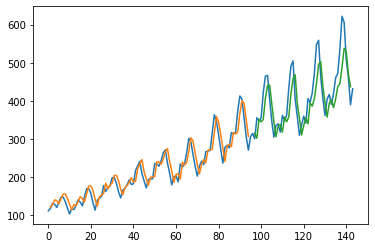

In [ ]:
#Reshape the input data
trainPredict = numpy.reshape(trainPredict, (trainPredict.shape[0], trainPredict.shape[1]))
testPredict = numpy.reshape(testPredict, (testPredict.shape[0], testPredict.shape[1]))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions after inverting their values
plt.plot(Scaler.inverse_transform(dataset))
plt.plot(Scaler.inverse_transform(trainPredictPlot))
plt.plot(Scaler.inverse_transform(testPredictPlot))

#Align and plot the actual and predicted values for the entire dataset
plt.show()

#d) Predict the next month's value given this month and the previous two months

In [ ]:
#Obtain the four-columns input-output dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
model = Sequential()

#Build the LSTM network with a hidden layer of 4 neurons
model.add(LSTM(4, input_dim=look_back, recurrent_activation='sigmoid', return_sequences=True))

#And an output layer with a single neuron
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

#Reshape the input data to be in the [samples, time steps, features] format
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
92/92 - 0s - loss: 0.0450
Epoch 2/100
92/92 - 0s - loss: 0.0186
Epoch 3/100
92/92 - 0s - loss: 0.0127
Epoch 4/100
92/92 - 0s - loss: 0.0110
Epoch 5/100
92/92 - 0s - loss: 0.0099
Epoch 6/100
92/92 - 0s - loss: 0.0088
Epoch 7/100
92/92 - 0s - loss: 0.0080
Epoch 8/100
92/92 - 0s - loss: 0.0069
Epoch 9/100
92/92 - 0s - loss: 0.0064
Epoch 10/100
92/92 - 0s - loss: 0.0059
Epoch 11/100
92/92 - 0s - loss: 0.0053
Epoch 12/100
92/92 - 0s - loss: 0.0050
Epoch 13/100
92/92 - 0s - loss: 0.0048
Epoch 14/100
92/92 - 0s - loss: 0.0045
Epoch 15/100
92/92 - 0s - loss: 0.0046
Epoch 16/100
92/92 - 0s - loss: 0.0044
Epoch 17/100
92/92 - 0s - loss: 0.0043
Epoch 18/100
92/92 - 0s - loss: 0.0042
Epoch 19/100
92/92 - 0s - loss: 0.0041
Epoch 20/100
92/92 - 0s - loss: 0.0042
Epoch 21/100
92/92 - 0s - loss: 0.0042
Epoch 22/100
92/92 - 0s - loss: 0.0041
Epoch 23/100
92/92 - 0s - loss: 0.0040
Epoch 24/100
92/92 - 0s - loss: 0.0039
Epoch 25/100
92/92 - 0s - loss: 0.0040
Epoch 26/100
92/92 - 0s - loss: 0.

In [ ]:
#Calculate and print the root-mean-squared-error (RMSE) in training and test data
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00 MSE (0.04 RMSE)
Test Score: 0.02 MSE (0.13 RMSE)


In [ ]:
#Predict the next month's number of passengers
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

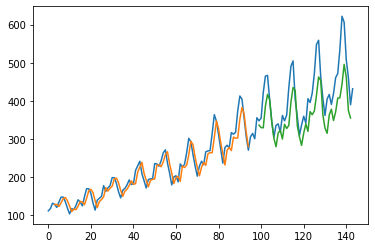

In [ ]:
#Reshape the input data
trainPredict = numpy.reshape(trainPredict, (trainPredict.shape[0], trainPredict.shape[1]))
testPredict = numpy.reshape(testPredict, (testPredict.shape[0], testPredict.shape[1]))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions after inverting their values
plt.plot(Scaler.inverse_transform(dataset))
plt.plot(Scaler.inverse_transform(trainPredictPlot))
plt.plot(Scaler.inverse_transform(testPredictPlot))

#Align and plot the actual and predicted values for the entire dataset
plt.show()

#Refrence:

Brownlee, Jason. “Time Series Prediction With Deep Learning in Keras.” Machine Learning Mastery, 27 Aug. 2020, [machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/](https://). 